In [5]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist;
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data();

In [7]:
X_train_full.shape

X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # Transforms input to 28 * 28 -element array
model.add(keras.layers.Dense(300, activation="relu")) # Two hidden layers
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) # Ouptut layer

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
  optimizer="sgd",
  metrics=["accuracy"])

In [31]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7260 - accuracy: 0.7607 - val_loss: 0.5028 - val_accuracy: 0.8346
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4896 - accuracy: 0.8292 - val_loss: 0.4577 - val_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4450 - accuracy: 0.8457 - val_loss: 0.4162 - val_accuracy: 0.8606
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4173 - accuracy: 0.8533 - val_loss: 0.4262 - val_accuracy: 0.8442
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3967 - accuracy: 0.8609 - val_loss: 0.3766 - val_accuracy: 0.8708
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3801 - accuracy: 0.8676 - val_loss: 0.3883 - val_accuracy: 0.8622
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3672 - accuracy: 0.8709 - val_loss: 0.3775 - val_accuracy:

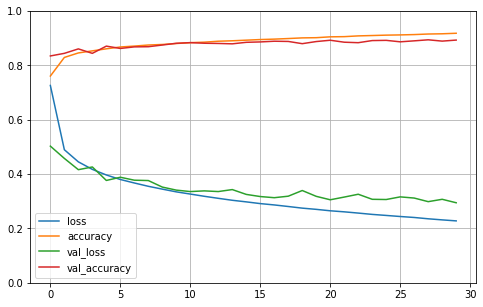

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 61.8580 - accuracy: 0.8500


[61.857967376708984, 0.8500000238418579]

In [34]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

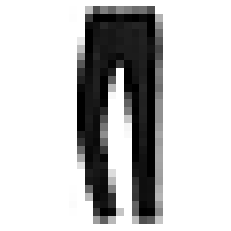

'Trouser'

In [45]:
import numpy as np
plt.imshow(X_new[2], cmap="binary")
plt.axis('off')
plt.show()
class_names[np.argmax(model.predict(X_new), axis=-1)[2]]

# Regression Problems

In [46]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
  keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

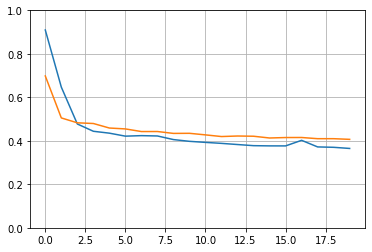

In [50]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Using the **Functional** API

In [52]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])